 En un centro de datos de alta eficiencia se monitorean continuamente diversos
 parámetros críticos para garantizar el rendimiento óptimo de los sistemas.
 Uno de los parámetros más relevantes es la temperatura de los servidores.
 Tras un análisis exhaustivo, se concluye que la temperatura de los servidores
 se distribuye de forma normal con una media de µ = 35◦C y una desviación
 estándar de σ = 2,5◦C. A partir de esta información, resuelva las siguientes
 cuestiones:

In [3]:
#Nota: Utilizare librerias porque no hay ninguna especificación en la consigna de no hacerlo.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


Realice las gráficas correspondientes a la función de densidad de probabilidad (pdf) 
y a la función de distribución acumulada (cdf) de la temperatura de los servidores.

In [4]:
#definir partes de la función
mu = 35
sigma = 2.5
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000) 

# este es la función de densidad de probabilidad
pdf = norm.pdf(x, mu, sigma)
# este es la función de distribución acumulada
cdf = norm.cdf(x, mu, sigma)


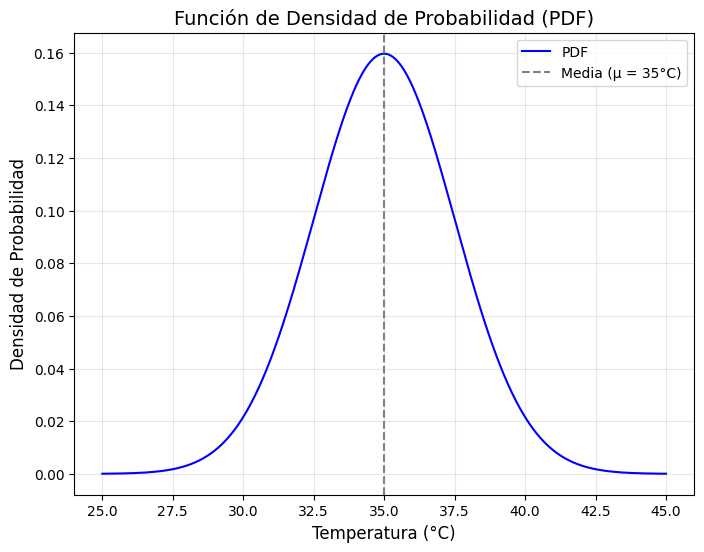

In [5]:
# graficar pdf
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="PDF", color="blue")
plt.axvline(mu, color='gray', linestyle='--', label=f'Media (μ = {mu}°C)')
plt.title("Función de Densidad de Probabilidad (PDF)", fontsize=14)
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

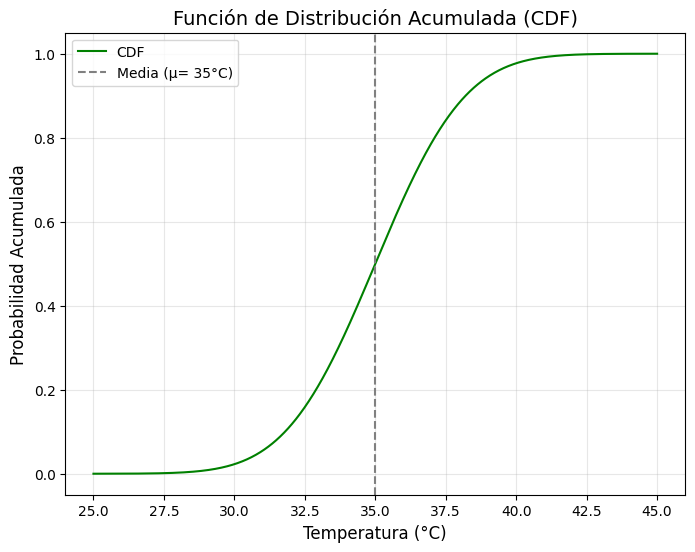

In [6]:
# Graficar CDF
plt.figure(figsize=(8, 6))
plt.plot(x, cdf, label="CDF", color="green")
plt.title("Función de Distribución Acumulada (CDF)", fontsize=14)
plt.axvline(mu, color='gray', linestyle='--', label=f'Media (μ= {mu}°C)')
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Probabilidad Acumulada", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

El sistema de enfriamiento se activa automáticamente cuando la temperatura supera los 40◦C. Calcule la probabilidad de que, para un servidor seleccionado al azar, el sistema de enfriamiento se active.

In [7]:
#Vamos a calcular la probabilidad acumulada de que X sea < a 40°c y > 40°c
#Vamos a sacar el valor estandarizado 

z= (40 - mu) / sigma

#probabilidad acumulada de que X sea < a 40°c
prob_menor = (norm.cdf(z))*100
print(f"La probabilidad de que la temperatura sea menor a 40°C es: {prob_menor:.2f}%")

#probabilidad acumulada de que X sea > a 40°c
prob_mayor = (1 - norm.cdf(40, mu, sigma))*100
print(f"La probabilidad de que la temperatura sea mayor a 40°C es: {prob_mayor:.2f}%")

print(f"Por lo tanto, la probabilidad de que el sistema de enfriamiento se active es del {prob_mayor:.2f}% ")


La probabilidad de que la temperatura sea menor a 40°C es: 97.72%
La probabilidad de que la temperatura sea mayor a 40°C es: 2.28%
Por lo tanto, la probabilidad de que el sistema de enfriamiento se active es del 2.28% 


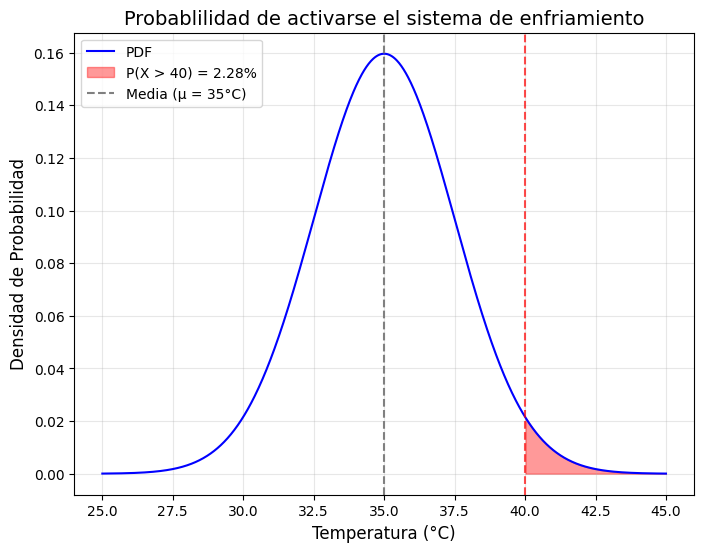

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="PDF", color="blue")
plt.fill_between(x, 0, pdf, where=(x >= 40), color='red', alpha=0.4, label=f'P(X > 40) = {prob_mayor:.2f}%')
plt.axvline(mu, color='gray', linestyle='--', label=f'Media (μ = {mu}°C)')
plt.axvline(40, color='red', linestyle='--', alpha=0.7)
plt.title("Probablilidad de activarse el sistema de enfriamiento", fontsize=14)
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Se sabe que los servidores operan de manera óptima cuando su temperatura se encuentra entre 30◦C y 38◦C. Determine el porcentaje de tiempo de que un servidor opere dentro de este rango de temperatura óptimo?

In [9]:
#Vamos a calcular la probabilidad acumulada de que X este en el rango de temperatura óptimo [30°c,38°c]
porcentaje_tiempo_temp_optima = (norm.cdf(38, mu, sigma) - norm.cdf(30, mu, sigma))*100

print(f"El servidor opera dentro del rango óptimo de temperatura el {porcentaje_tiempo_temp_optima:.2f}% del tiempo.")


El servidor opera dentro del rango óptimo de temperatura el 86.22% del tiempo.


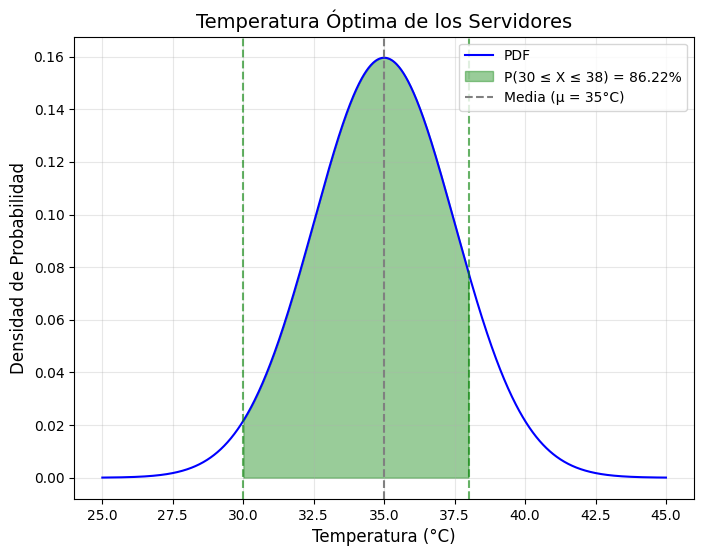

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="PDF", color="blue")
plt.fill_between(x, 0, pdf, where=(x >= 30) & (x <= 38), color='green', alpha=0.4,
                 label=f'P(30 ≤ X ≤ 38) = {porcentaje_tiempo_temp_optima:.2f}%')
plt.axvline(mu, color='gray', linestyle='--', label=f'Media (μ = {mu}°C)')
plt.axvline(30, color='Green', linestyle='--', alpha=0.6)
plt.axvline(38, color='Green', linestyle='--', alpha=0.6)
plt.title("Temperatura Óptima de los Servidores", fontsize=14)
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

El equipo de mantenimiento desea establecer un umbral de alerta temprana
 para intervenir antes de que se active el enfriamiento automatico. ¿A que
 temperatura debe situarse este umbral si se quiere que la alerta se active
 en el 10% superior de los eventos de temperatura (es decir, en el percentil
 90)?

In [11]:
# Percentil 90
umbral_alerta = norm.ppf(0.90, loc=mu, scale=sigma)
print("Umbral de alerta temprana (percentil 90):", round(umbral_alerta, 2), "°C")

Umbral de alerta temprana (percentil 90): 38.2 °C


Se implementa un nuevo sistema de monitoreo que registra el promedio de
 temperaturas de 5 servidores seleccionados aleatoriamente cada minuto.
 Asumiendo independencia entre las mediciones, calcule la probabilidad de
 que este promedio supere 37◦C en una lectura dada.

In [12]:
servidores = 5

# Desviación del promedio
sigma_promedio = sigma / np.sqrt(servidores)

# Probabilidad de que el promedio supere 37
prob_supera_37 = 1 - norm.cdf(37, loc=mu, scale=sigma_promedio)
print("Probabilidad de que el promedio de temperatura supere 37°C:", round(prob_supera_37 * 100, 2), "%")

Probabilidad de que el promedio de temperatura supere 37°C: 3.68 %


 En el centro de datos hay 1000 servidores. Determine la probabilidad de
 que, en un instante dado, mas de 25 servidores tengan una temperatura
 superior a 41◦C

In [15]:
n_servidores = 1000

# Probabilidad de que un servidor tenga temperatura > 41°C
p_supera_41 = 1 - norm.cdf(41, loc=mu, scale=sigma)

# Aproximamos con distribución normal
media_binomial = n_servidores * p_supera_41
desviacion_binomial = np.sqrt(n_servidores * p_supera_41 * (1 - p_supera_41))

# P(X > 25) = normal con corrección de continuidad: P(X > 25.5)
prob_mas_25 = 1 - norm.cdf(25.5, loc=media_binomial, scale=desviacion_binomial)

print("Probabilidad de que más de 25 servidores superen 41°C:", round(prob_mas_25 * 100, 4), "%")

Probabilidad de que más de 25 servidores superen 41°C: 0.0 %


Los ingenieros desean disenar un nuevo sistema de enfriamiento que pueda
 manejar el 99.9% de todos los eventos de temperatura. Calcule la temperatura maxima que debera soportar el sistema.

In [16]:
umbral_999 = norm.ppf(0.999, loc=mu, scale=sigma)
print("Temperatura máxima para cubrir el 99.9% de los eventos:", round(umbral_999, 2), "°C")

Temperatura máxima para cubrir el 99.9% de los eventos: 42.73 °C


Con el fin de optimizar el consumo de energıa, se plantea un sistema de
 enfriamiento variable que ajuste su potencia en funcion de la temperatura
 actual. Para ello, se propone dividir el rango de temperaturas en cuartiles.
 Calcule los puntos de corte (cuartiles) de la distribucion de la temperatura.
 Explique brevemente como estos cuartiles podrıan utilizarse para definir
 una estrategia de enfriamiento de cuatro niveles (por ejemplo, baja, mo
derada, alta y crıtica)

In [17]:
Q1 = norm.ppf(0.25, loc=mu, scale=sigma)
Q2 = norm.ppf(0.50, loc=mu, scale=sigma)
Q3 = norm.ppf(0.75, loc=mu, scale=sigma)

print("Q1 (25%):", round(Q1, 2), "°C")
print("Q2 (50% - mediana):", round(Q2, 2), "°C")
print("Q3 (75%):", round(Q3, 2), "°C")

Q1 (25%): 33.31 °C
Q2 (50% - mediana): 35.0 °C
Q3 (75%): 36.69 °C


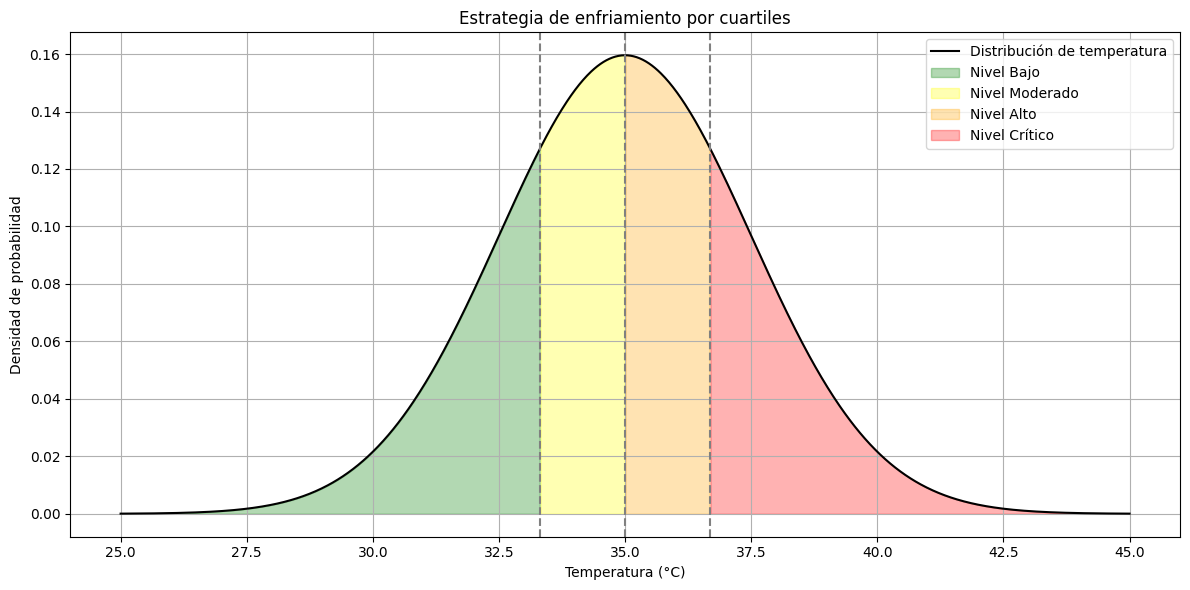

In [18]:
# Valores para el eje x
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Cuartiles
Q1 = norm.ppf(0.25, mu, sigma)
Q2 = norm.ppf(0.50, mu, sigma)
Q3 = norm.ppf(0.75, mu, sigma)

# Crear la figura
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Distribución de temperatura', color='black')

# Colorear zonas por cuartiles
plt.fill_between(x, y, where=(x < Q1), color='green', alpha=0.3, label='Nivel Bajo')
plt.fill_between(x, y, where=(x >= Q1) & (x < Q2), color='yellow', alpha=0.3, label='Nivel Moderado')
plt.fill_between(x, y, where=(x >= Q2) & (x < Q3), color='orange', alpha=0.3, label='Nivel Alto')
plt.fill_between(x, y, where=(x >= Q3), color='red', alpha=0.3, label='Nivel Crítico')

# Marcar cuartiles
for q in [Q1, Q2, Q3]:
    plt.axvline(q, color='gray', linestyle='--')

# Etiquetas y leyenda
plt.title('Estrategia de enfriamiento por cuartiles')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()